# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
#откроем файл с данными и изучим общую информацию
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

**Можно отметить, что в таблице с данными у нас нет проблем с названиями столбцов, они все написаны корректно и точно отображают информацию записанную в них. Используя метод info можем заметить, что существуют столбцы с достаточным количеством пропущенных значений, которыми придется заняться, также есть несколько столбцов - в которых потребуется изменить тип данных.**

## Предобработка данных

### Заменим пустые значения, там где это возможно сделать, предположив логичную замену.

In [3]:
df['balcony'] = df['balcony'].fillna(0) #если человек не указал число балконов — скорее всего, их нет. 
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean()) #высота потолков не критически важный критерий, можно заполнить его средней величиной.
df.dropna(subset=['locality_name'], inplace=True) #49 строчек с пропущенным значением насесленного пункта - это 0.2% от общего числа данных, врядли сыграют большую роль,
#тем более невозможно заполнить этот столбец не зная точного названия города, так что удалим их. 
df['is_apartment'] = df['is_apartment'].fillna('False') #предположим, что пропуск в этом столбце означает, что недвижимость - не является апартаментами.
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.771499,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.771499,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.771499,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.771499,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.771499,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.771499,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.771499,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.500000,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

**Попробуем еще заполнить некоторые пропуски.**

In [5]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

**Судя по всему, в этих столбцах пропущенные значения - можно принять за отсутствие парков и прудов в радиусе 3000 метров, поэтому заполнили их нулем.**

In [6]:
df.query('locality_name == "Санкт-Петербург"').isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              70
living_area             1140
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            1379
balcony                    0
locality_name              0
airports_nearest          85
cityCenters_nearest       61
parks_around3000           0
parks_nearest           8437
ponds_around3000           0
ponds_nearest           7738
days_exposition         2083
dtype: int64

**Так как подавляющее большинство пропущенных значений в floors_total находится в Санкт-Петербурге, заполним пропуски этого столбца - медианным значением по Санкт-Петербургу.**

In [7]:
print(df['floors_total'].median())

9.0


In [8]:
df['floors_total'] = df['floors_total'].fillna(9)
df['floors_total'].isna().sum()

0

**В столбцах living_area и kitchen_area, присутствует зависимость от общей площади total_area - в которой нету пропусков. Попробуем посчитать средний коэффициент, который всегда составляют жилая и площадь кухни от общей, и использовать его.**

In [9]:
coeff_living_area = df['living_area'] / df['total_area']
print(coeff_living_area.mean())

0.5647499988246565


In [10]:
coeff_kitchen_area = df['kitchen_area'] / df['total_area']
print(coeff_kitchen_area.mean())

0.18737152810064503


In [11]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * 0.56)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * 0.18)

In [12]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

# Заполнили пропущенные значения в тех столбцах, в которых это показалось возможным, используя средние доли и медианные значения из известных столбцов.

### Посмотрим где стоит заменить тип данных

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        23650 non-null float64
parks_nearest           8064 non-null float64
ponds_around30

In [14]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # так как это дата, то приведем тип данных к datetime. 
df['is_apartment'] = df['is_apartment'].astype('bool') #этот столбец должен быть булевым значением, так как отвечает на вопрос являются ли объект - апартаментами.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        23650 non-null float64
parks_nearest           8064 non-null float64
ponds_ar

## Расчёты и добавление результатов в таблицу

### Добавим в таблицу столбец с ценой квадратного метра.

In [15]:
df['price_per_meter'] = df['last_price'] / df['total_area']
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16.0,51.000,8,True,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.40,2018-12-04,1,2.771499,11.0,18.600,1,True,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.00,2015-08-20,2,2.771499,5.0,34.300,4,True,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.00,2015-07-24,3,2.771499,14.0,89.040,9,True,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14.0,32.000,13,True,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
5,10,2890000.0,30.40,2018-09-10,1,2.771499,12.0,14.400,5,True,...,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065.789474
6,6,3700000.0,37.30,2017-11-02,1,2.771499,26.0,10.600,6,True,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456
7,5,7915000.0,71.60,2019-04-18,2,2.771499,24.0,40.096,22,True,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737
8,20,2900000.0,33.16,2018-05-23,1,2.771499,27.0,15.430,26,True,...,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0,87454.764777
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9.0,43.600,7,True,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164


### Добавим столбцы - соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [16]:
df['living_share'] = df['living_area'] / df['total_area']
df['kitchen_share'] = df['kitchen_area'] / df['total_area']
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,living_share,kitchen_share
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.00,8,True,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11.0,18.60,1,True,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5.0,34.30,4,True,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14.0,89.04,9,True,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,0.560000,0.180000
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.00,13,True,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,0.320000,0.410000


### Добавим день недели публикации объявления.

In [17]:
df['weekday'] = df['first_day_exposition'].dt.weekday
    
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,living_share,kitchen_share,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.00,8,True,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,0.472222,0.231481,3
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11.0,18.60,1,True,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,0.460396,0.272277,1
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5.0,34.30,4,True,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,0.612500,0.148214,3
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14.0,89.04,9,True,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,0.560000,0.180000,4
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.00,13,True,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,0.320000,0.410000,1


## Исследовательский анализ данных

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

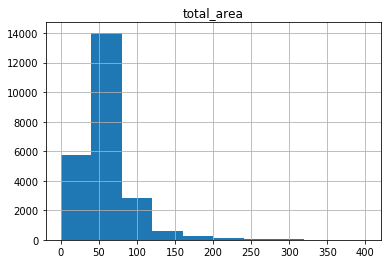

In [18]:
import matplotlib.pyplot as plt
df.hist('total_area', range=(0,400))
plt.show()

**Больше всего квартир площадью от 50 до 100 квадратных метров.**

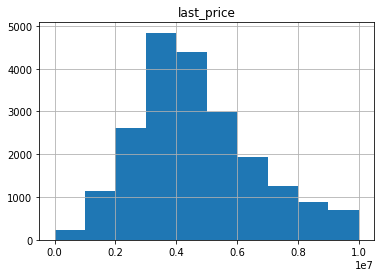

In [19]:
df.hist('last_price', range=(0, 10000000))
plt.show()

**Больше всего квартир по цене от 4 до 5 млн.**

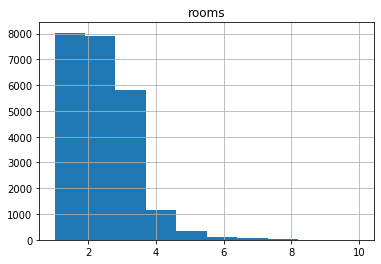

In [20]:
df.hist('rooms', range=(1, 10))
plt.show()

**Больше всего в данных однокомнатных и двухкомнатных квартир.**

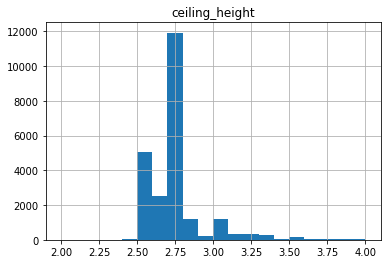

In [21]:
df.hist('ceiling_height', bins=20, range=(2,4))
plt.show()

**Самая распространенная высота потолка - 2,75м.**

### Изучим время продажи квартиры. Построим гистограмму. Найдем среднее и медиану.

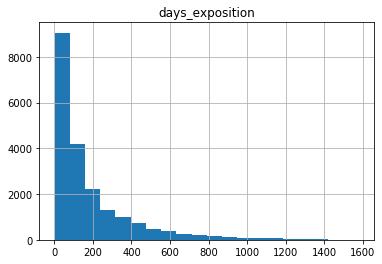

In [22]:
df.hist('days_exposition', bins=20)
plt.show()

In [23]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Судя по данным, есть уникальный случай продажи недвижимости в течении 1580 дней и некоторое количество случаев продажи более 1000 дней, уберем их и снова построим гистограмму.**

### Уберем редкие и выбивающиеся значения. 

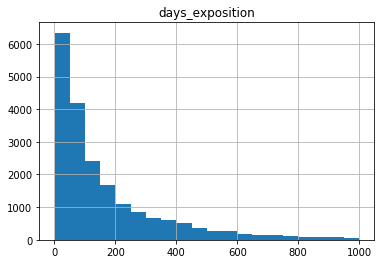

In [24]:
days_exposition = df.query('days_exposition < 1000')
days_exposition.hist('days_exposition', bins=20)
plt.show()

In [25]:
days_exposition['days_exposition'].describe()

count    20192.000000
mean       167.160063
std        187.390861
min          1.000000
25%         44.000000
50%         93.000000
75%        221.000000
max        999.000000
Name: days_exposition, dtype: float64

**На среднее и медиану значения более 1000 дней влияют не очень сильно, в целом средняя продолжительность продажи составляет 160 - 180 дней.**

### Какие факторы больше всего влияют на стоимость квартиры? 

In [26]:
print(df['total_area'].corr(df['last_price']))

0.6537428966335397


**Коэффициент корреляции показывает, что зависимость цены от площади не сильная.**

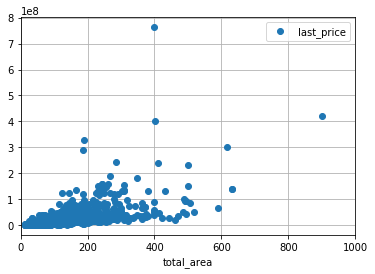

In [27]:
import matplotlib.pyplot as plt
df.plot(x='total_area', y='last_price', style='o', xlim=(0,1000), grid=True)
plt.show()

**График также показывает, что зависимость цены от площади не сильная.**

In [28]:
print(df['rooms'].corr(df['last_price']))

0.36342062218770693


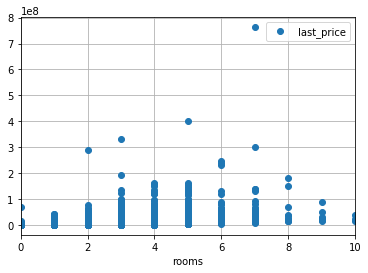

In [29]:
df.plot(x='rooms', y='last_price', style='o', xlim=(0,10), grid=True)
plt.show()

**График и коэффициент корреляции также показали, что цена не зависит от количества комнат.**

In [30]:
print(df['cityCenters_nearest'].corr(df['last_price']))

-0.20688702501498762


**Коэффициент корреляции показал небольшую отрицательную зависимость цены от удаления от центра города, чем больше удаление, тем ниже цена.**

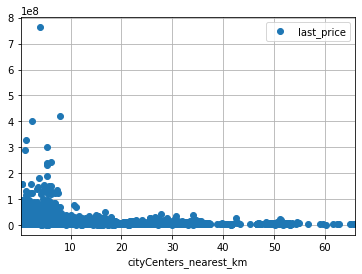

In [31]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000 #создадим столбец с расстоянием до центра в км.
df.plot(x='cityCenters_nearest_km', y='last_price', style='o', grid=True)
plt.show()

### Выберим 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [32]:
df['locality_name'].value_counts(ascending=False).head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

**10 населённых пунктов с наибольшим числом объявлений.**

In [33]:
df_pivot = df.pivot_table(index="locality_name", values='price_per_meter', aggfunc='mean')
display(df_pivot)

,price_per_meter
locality_name,
Бокситогорск,17551.591819
Волосово,40183.325974
Волхов,35087.679877
Всеволожск,68654.473986
Выборг,58141.909153
...,...
село Путилово,39921.758208
село Рождествено,37733.159586
село Русско-Высоцкое,54833.726028


**Средняя цена квадратного метра в этих населённых пунктах.**

# Населённые пункты с самой высокой и низкой стоимостью жилья.

In [34]:
print(df['last_price'].max())

763000000.0


In [35]:
display(df.query('last_price == 763000000.0'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,living_share,kitchen_share,weekday,cityCenters_nearest_km
12971,19,763000000.0,400.0,2017-09-30,7,2.771499,10.0,250.0,10,True,...,1.0,530.0,3.0,756.0,33.0,1907500.0,0.625,0.18,5,3.956


In [36]:
print(df['last_price'].min())

12190.0


In [37]:
display(df.query('last_price == 12190.0'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,living_share,kitchen_share,weekday,cityCenters_nearest_km
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,True,...,1.0,805.0,0.0,NaN,8.0,111.834862,0.293578,0.37156,2,9.176


### Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге. Выясним, какая область входит в центр. Столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

In [38]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round()

In [39]:
df_spb = df.query('locality_name == "Санкт-Петербург"')
display(df_spb)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,living_share,kitchen_share,weekday,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16.0,51.000,8,True,...,1.0,482.0,2.0,755.0,NaN,120370.370370,0.472222,0.231481,3,16.0
2,10,5196000.0,56.00,2015-08-20,2,2.771499,5.0,34.300,4,True,...,1.0,90.0,2.0,574.0,558.0,92785.714286,0.612500,0.148214,3,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.771499,14.0,89.040,9,True,...,2.0,84.0,3.0,234.0,424.0,408176.100629,0.560000,0.180000,4,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14.0,32.000,13,True,...,2.0,112.0,1.0,48.0,121.0,100000.000000,0.320000,0.410000,1,8.0
7,5,7915000.0,71.60,2019-04-18,2,2.771499,24.0,40.096,22,True,...,0.0,NaN,0.0,NaN,NaN,110544.692737,0.560000,0.263966,3,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.860000,15.0,16.300,4,True,...,1.0,353.0,2.0,652.0,29.0,100566.572238,0.461756,0.257790,2,16.0
23690,3,5500000.0,52.00,2018-07-19,2,2.771499,5.0,31.000,2,True,...,1.0,300.0,0.0,NaN,15.0,105769.230769,0.596154,0.115385,3,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.750000,25.0,40.300,7,True,...,0.0,NaN,1.0,806.0,519.0,129903.978052,0.552812,0.145405,3,4.0
23694,9,9700000.0,133.81,2017-03-21,3,3.700000,5.0,73.300,3,True,...,1.0,796.0,3.0,381.0,NaN,72490.845228,0.547792,0.103356,1,4.0


In [40]:
df_spb['km_mean_price'] = (df_spb['last_price'] / df_spb['cityCenters_nearest_km']).round()
display(df_spb)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,living_share,kitchen_share,weekday,cityCenters_nearest_km,km_mean_price
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16.0,51.000,8,True,...,482.0,2.0,755.0,NaN,120370.370370,0.472222,0.231481,3,16.0,812500.0
2,10,5196000.0,56.00,2015-08-20,2,2.771499,5.0,34.300,4,True,...,90.0,2.0,574.0,558.0,92785.714286,0.612500,0.148214,3,14.0,371143.0
3,0,64900000.0,159.00,2015-07-24,3,2.771499,14.0,89.040,9,True,...,84.0,3.0,234.0,424.0,408176.100629,0.560000,0.180000,4,7.0,9271429.0
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14.0,32.000,13,True,...,112.0,1.0,48.0,121.0,100000.000000,0.320000,0.410000,1,8.0,1250000.0
7,5,7915000.0,71.60,2019-04-18,2,2.771499,24.0,40.096,22,True,...,NaN,0.0,NaN,NaN,110544.692737,0.560000,0.263966,3,12.0,659583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.860000,15.0,16.300,4,True,...,353.0,2.0,652.0,29.0,100566.572238,0.461756,0.257790,2,16.0,221875.0
23690,3,5500000.0,52.00,2018-07-19,2,2.771499,5.0,31.000,2,True,...,300.0,0.0,NaN,15.0,105769.230769,0.596154,0.115385,3,6.0,916667.0
23691,11,9470000.0,72.90,2016-10-13,2,2.750000,25.0,40.300,7,True,...,NaN,1.0,806.0,519.0,129903.978052,0.552812,0.145405,3,4.0,2367500.0
23694,9,9700000.0,133.81,2017-03-21,3,3.700000,5.0,73.300,3,True,...,796.0,3.0,381.0,NaN,72490.845228,0.547792,0.103356,1,4.0,2425000.0


**Посчитали среднюю цену для каждого километра.**

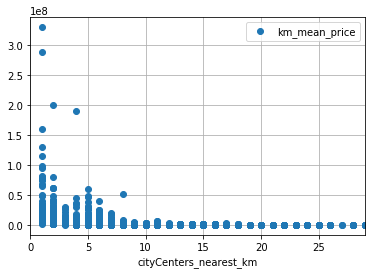

In [41]:
df_spb.plot(x='cityCenters_nearest_km', y='km_mean_price', style='o', grid=True)
plt.show()

**Кажется график меняется в районе 8км, это можно считать центральной зоной.**

### Выделим сегмент квартир в центре. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [42]:
df_spb_centers = df_spb.query('cityCenters_nearest_km <= 8')
display(df_spb_centers.head(10))#сегмент квартир в центре

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,living_share,kitchen_share,weekday,cityCenters_nearest_km,km_mean_price
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14.0,89.04,9,True,...,84.0,3.0,234.0,424.0,408176.100629,0.560000,0.180000,4,7.0,9271429.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.00,13,True,...,112.0,1.0,48.0,121.0,100000.000000,0.320000,0.410000,1,8.0,1250000.0
24,8,6500000.0,97.2,2015-10-31,2,2.771499,3.0,46.50,1,True,...,411.0,3.0,124.0,265.0,66872.427984,0.478395,0.201646,5,2.0,3250000.0
35,6,15500000.0,149.0,2017-06-26,5,2.771499,5.0,104.00,4,True,...,NaN,1.0,779.0,644.0,104026.845638,0.697987,0.114094,0,4.0,3875000.0
51,7,45000000.0,161.0,2017-10-17,3,3.200000,8.0,38.00,4,True,...,NaN,3.0,99.0,541.0,279503.105590,0.236025,0.310559,1,7.0,6428571.0
52,20,11795000.0,136.0,2017-09-22,6,3.000000,2.0,94.00,2,True,...,526.0,0.0,NaN,NaN,86727.941176,0.691176,0.080882,4,7.0,1685000.0
61,18,7990000.0,74.0,2017-08-24,2,2.771499,4.0,43.00,4,True,...,363.0,0.0,NaN,609.0,107972.972973,0.581081,0.270270,3,4.0,1997500.0
63,2,20000000.0,118.0,2018-09-11,3,3.000000,9.0,68.00,7,True,...,648.0,1.0,779.0,37.0,169491.525424,0.576271,0.135593,1,5.0,4000000.0
70,9,3400000.0,30.0,2018-09-05,1,2.771499,5.0,16.00,1,True,...,382.0,0.0,NaN,14.0,113333.333333,0.533333,0.233333,2,8.0,425000.0
94,3,3500000.0,29.5,2019-04-26,1,2.500000,5.0,15.60,2,True,...,NaN,0.0,NaN,4.0,118644.067797,0.528814,0.186441,4,7.0,500000.0


In [43]:
df_spb_centers['rooms'].corr(df_spb_centers['last_price'])

0.34054074808961077

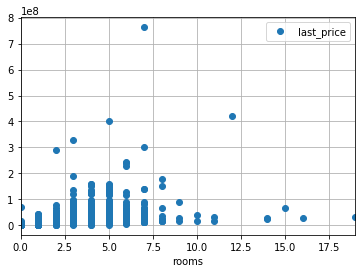

In [44]:
df_spb_centers.plot(x='rooms', y='last_price', style='o', grid=True)
plt.show()

In [45]:
df_spb_centers['floor'].corr(df_spb_centers['last_price'])

0.11069254892494505

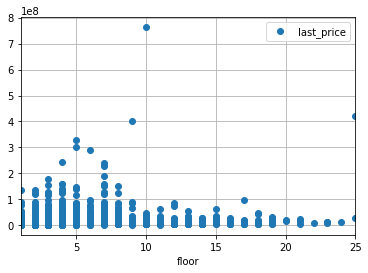

In [46]:
df_spb_centers.plot(x='floor', y='last_price', style='o', grid=True)
plt.show()

In [47]:
df_spb_centers['cityCenters_nearest_km'].corr(df_spb_centers['last_price'])

-0.07602026670211756

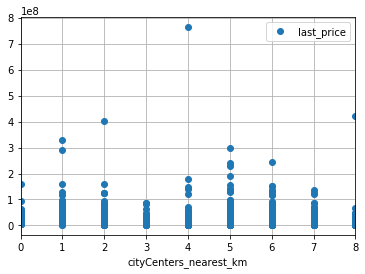

In [48]:
df_spb_centers.plot(x='cityCenters_nearest_km', y='last_price', style='o', grid=True)
plt.show()

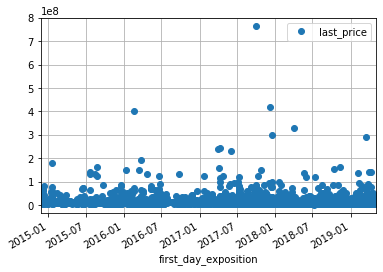

In [49]:
df_spb_centers.plot(x='first_day_exposition', y='last_price', style='o', grid=True)
plt.show()

**Судя по коэффициентам корреляции и графикам, для сегмента квартир в центре, зависимость от количества комнат, даты размещения и этажа - очень низкая.**

## Общий вывод

# В нашем распоряжении были данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Мы обработали данные заполнив пропущенные значения подходящими, и изменив тип некоторых данных. Также установили параметры которые могут влиять на рыночную стоимость объектов недвижимости. Установили какая зависимость прослеживается между теми или иными параметрами и как они связаны между собой. 